In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("F:/my courses/Projects/Data_Meth/walmart-sales-dataset-of-45stores.csv",sep=",",encoding='utf-8')
df.sample(5)
df1=df.copy()
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df1['Date'] = pd.to_datetime(df['Date'])

df1.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df1=df1.drop_duplicates()
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [8]:
def assign_holiday(date):
    if date in [ '2010-11-26 00:00:00', '2010-10-09 00:00:00']:
        return 'Super Bowl'
    elif date in [  '2010-12-02 00:00:00', '2011-09-06 00:00:00','2010-12-02 00:00:00']:
        return 'Labour Day'
    elif date in ['2010-11-26 00:00:00', '2011-11-25 00:00:00', '2012-10-23 00:00:00', '2012-11-01 00:00:00']:
        return 'Thanksgiving'
    elif date in ['2010-12-31 00:00:00', '2011-12-30 00:00:00', '2010-12-27 00:00:00']:
        return 'Christmas'
    else:
        return 'Non-Holiday' 

In [9]:
df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.day
df1['MonthYear_value'] = df1['Date'].dt.to_period('M')
df1['Holiday'] = df1['Date'].apply(lambda x : assign_holiday(str(x)))
df1['season'] = (df1['Date'].dt.month%12 + 3)//3
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df1['season_name'] = df1['season'].map(seasons)
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value,Holiday,season,season_name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05,Non-Holiday,2,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12,Labour Day,1,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02,Non-Holiday,1,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02,Non-Holiday,1,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05,Non-Holiday,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,2012-09,Non-Holiday,4,Autumn
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,2012-05,Non-Holiday,2,Spring
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,2012-12,Non-Holiday,1,Winter
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,2012-10,Non-Holiday,4,Autumn


<AxesSubplot:>

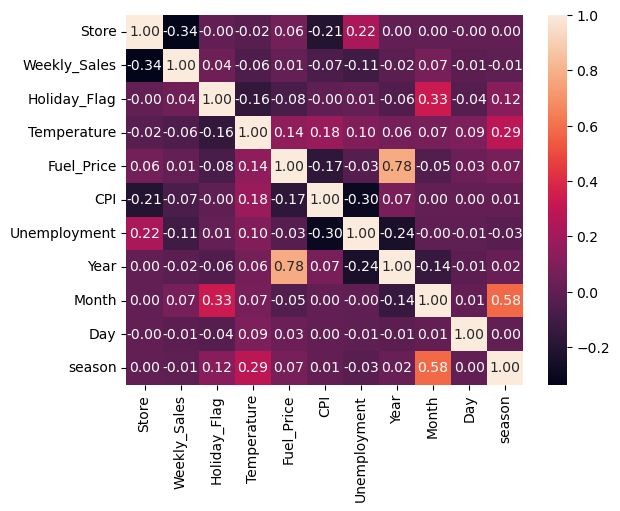

In [10]:
#check_correlation
sns.heatmap(data=df1.corr(), annot=True, fmt='.2f', cbar=True)

In [11]:
df1.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,season
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,6.289676e-16,-1.070464e-15,9.514883e-17
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,6.753523e-02,-1.487292e-02,-1.092903e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,3.322341e-01,-3.603594e-02,1.197071e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,6.643970e-02,8.901925e-02,2.898998e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-5.283174e-02,3.253169e-02,6.710936e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,1.478843e-03,3.965821e-03,7.940561e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-2.061552e-03,-8.166853e-03,-2.836733e-02
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.390145e-01,-1.277942e-02,2.112501e-02
Month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-1.390145e-01,1.000000e+00,5.959249e-03,5.824357e-01
Day,-1.070464e-15,-0.014873,-3.603594e-02,0.089019,0.032532,0.003966,-0.008167,-1.277942e-02,5.959249e-03,1.000000e+00,3.097914e-03


In [12]:
#Find corrlation between'Weekly_Sales' and 'Temperature','Fuel_Price','CPI'
df1[["Weekly_Sales",'Fuel_Price']].corr()
#weak

,Weekly_Sales,Fuel_Price
Weekly_Sales,1.000000,0.009464
Fuel_Price,0.009464,1.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

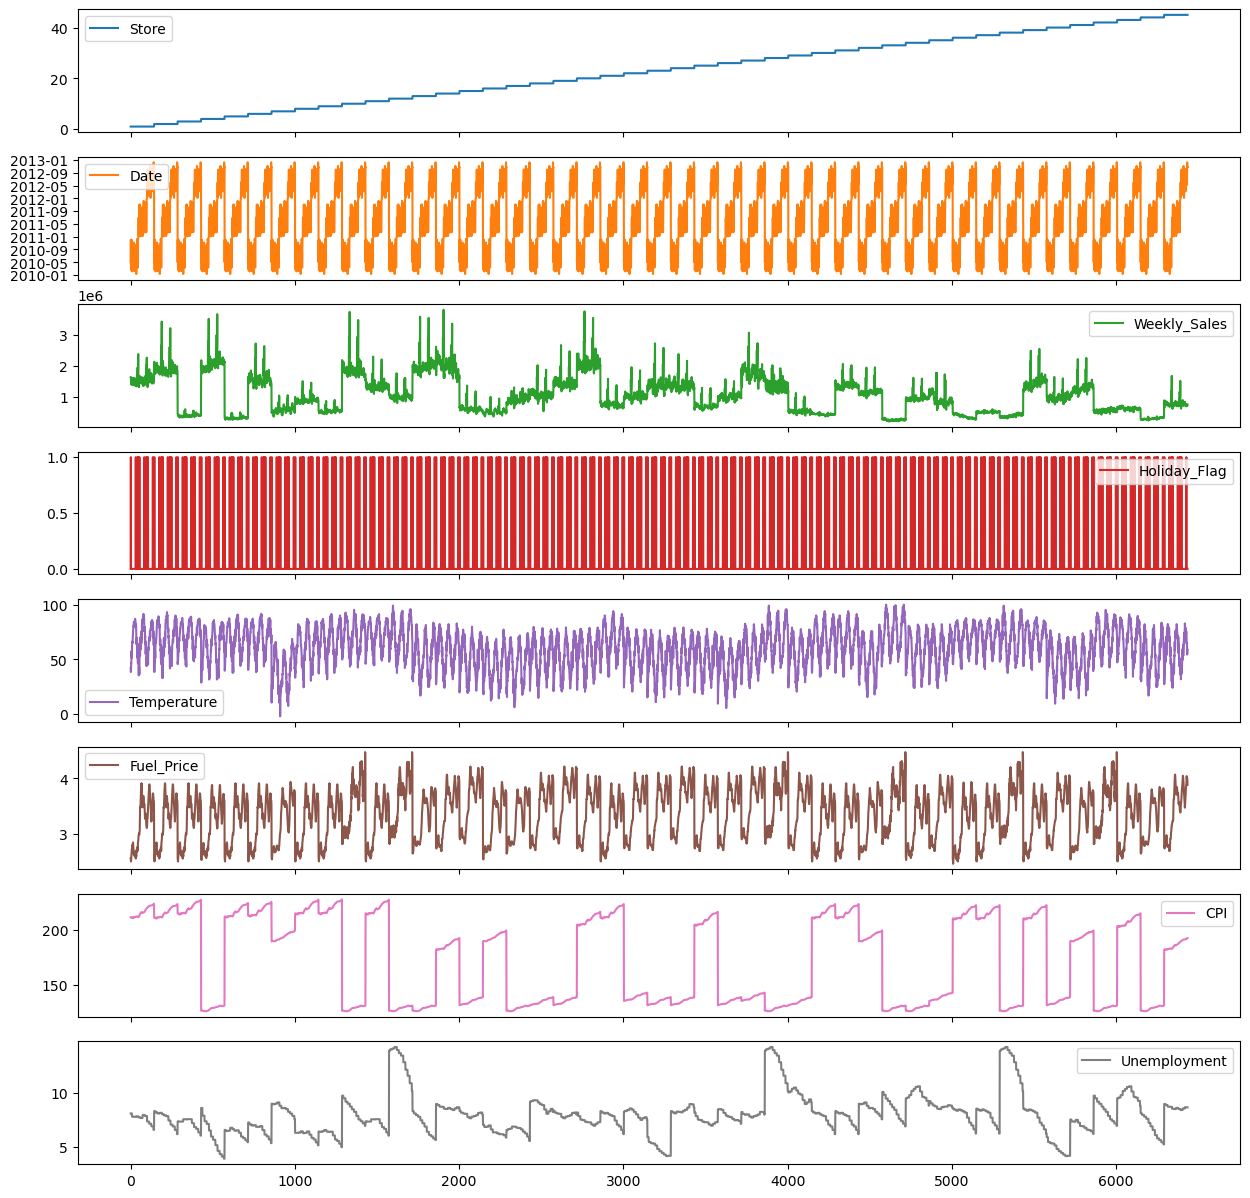

In [13]:
#Value Distribution
df1[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']].plot(subplots=True,  figsize=(15,15))

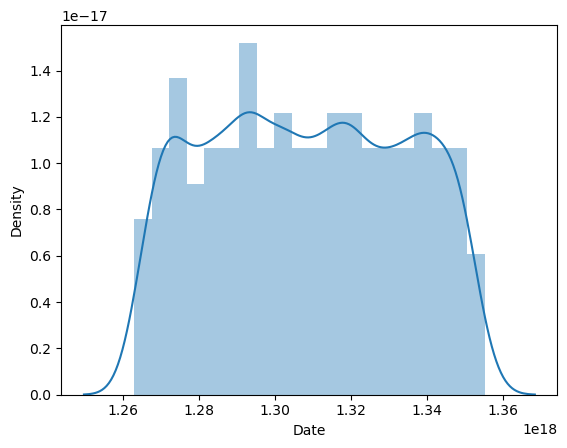

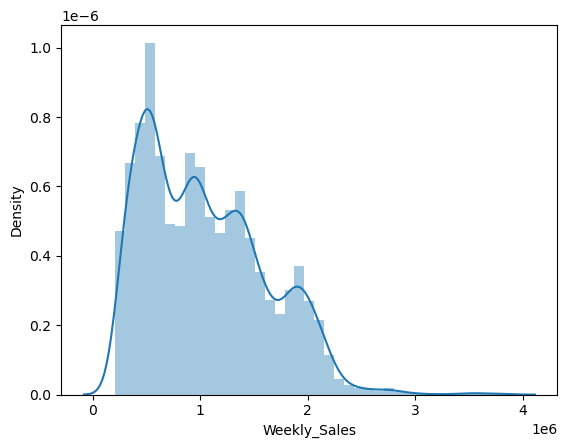

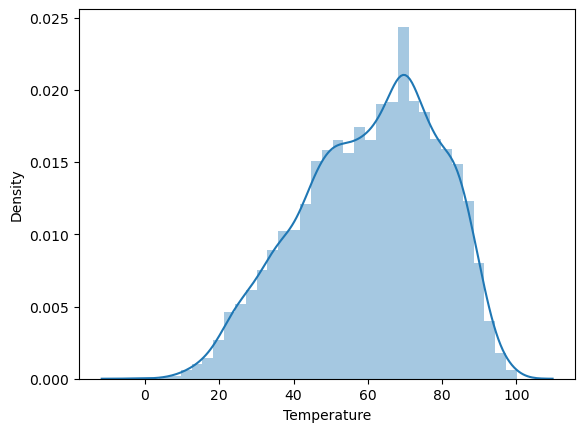

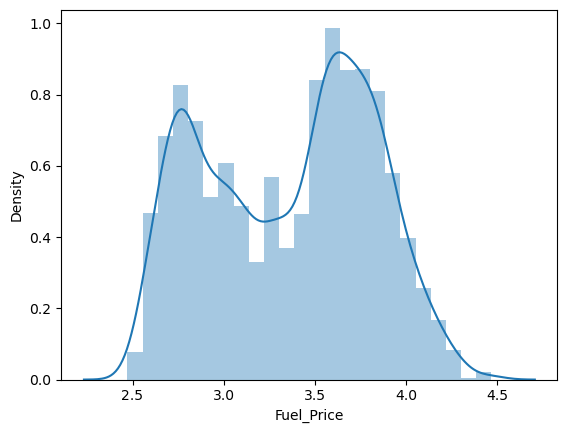

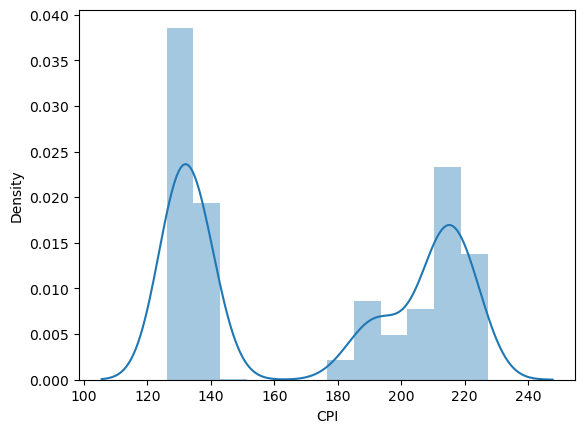

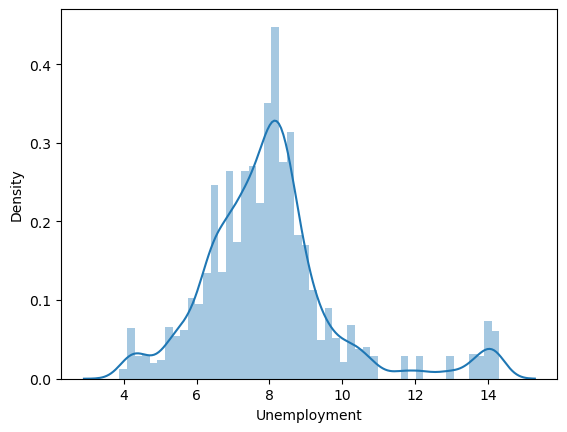

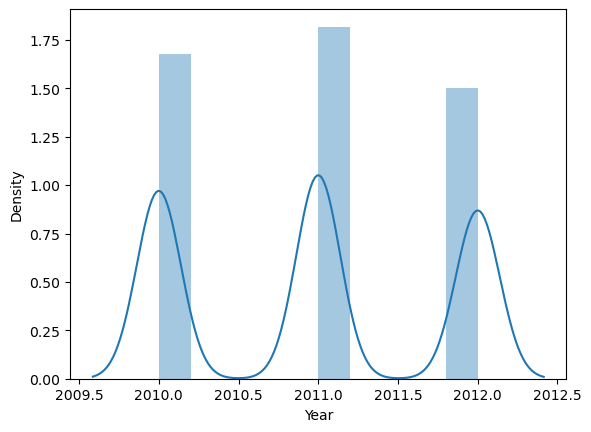

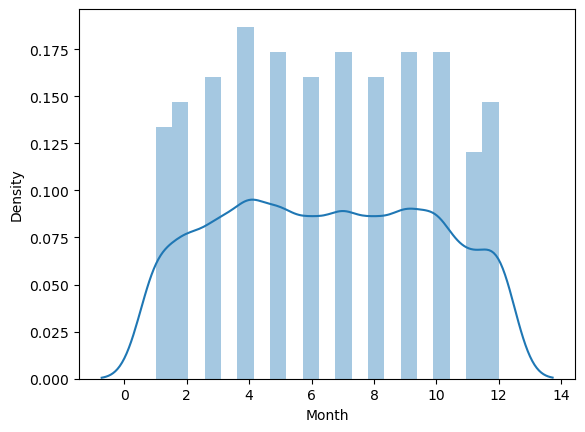

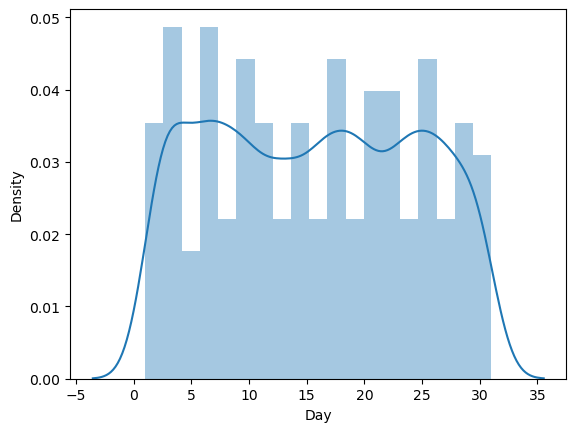

In [14]:
#visualize quantitive variables
for coulumn in ['Date','Weekly_Sales', 'Temperature','Fuel_Price', 'CPI','Unemployment','Year','Month','Day']:
    plt.figure()
    sns.distplot(df1[coulumn])

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

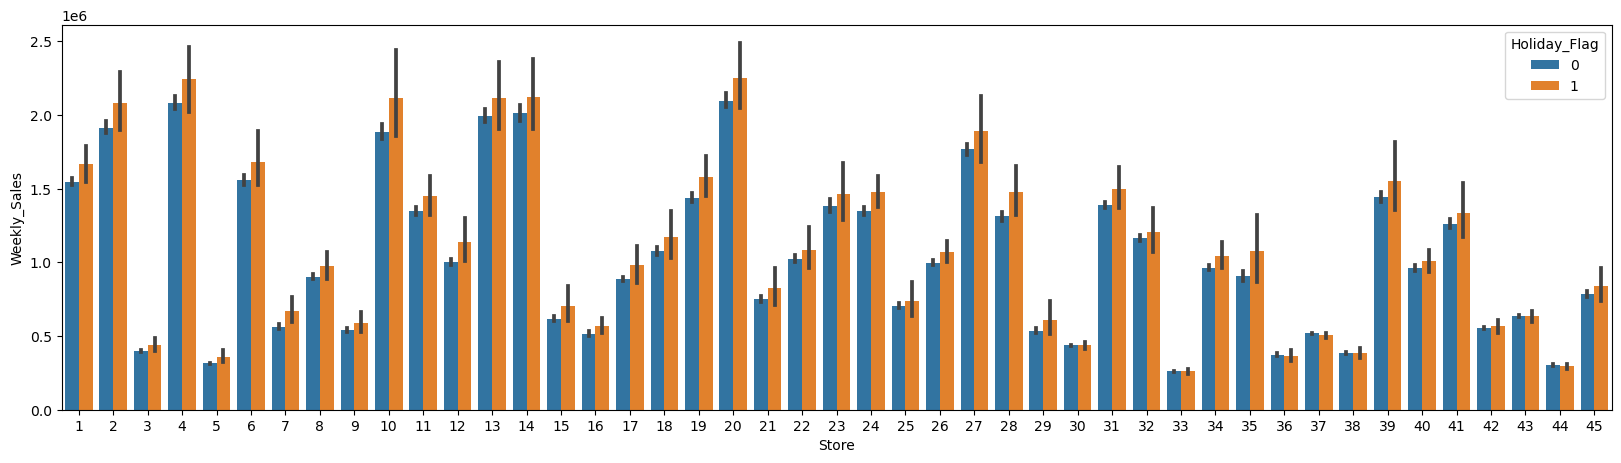

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df1, x="Store", y="Weekly_Sales", hue="Holiday_Flag", ax=ax)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'CPI'}>],
       [<AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'Unemployment'}>]], dtype=object)

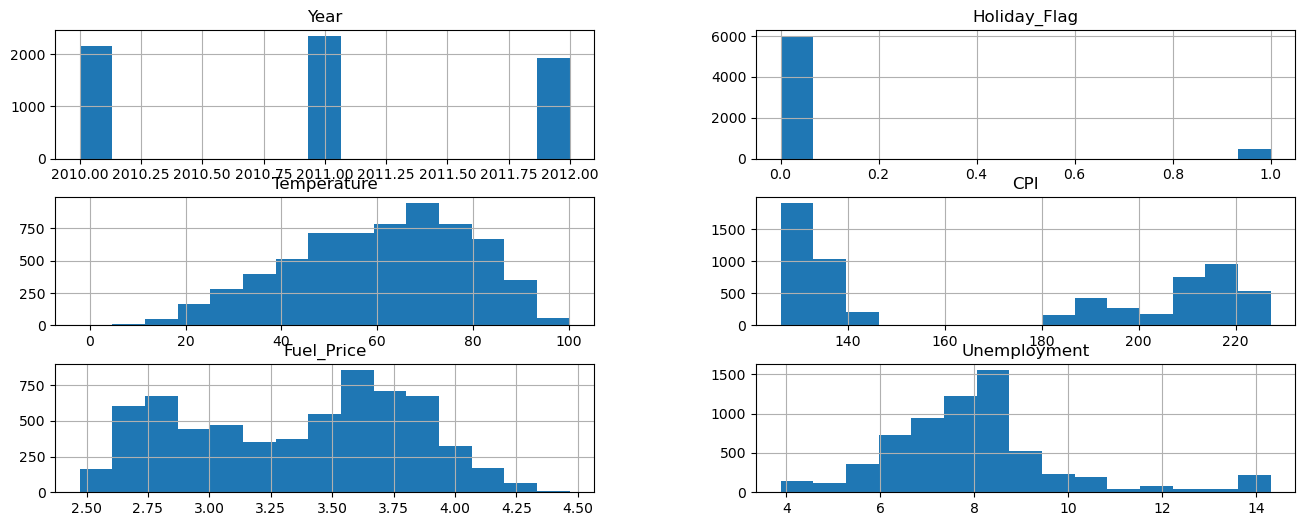

In [16]:
df1[['Year', 'Holiday_Flag','Temperature','CPI','Fuel_Price', 'Unemployment']].hist(bins=15, figsize=(16, 6))

array([<AxesSubplot:xlabel='MonthYear_value'>], dtype=object)

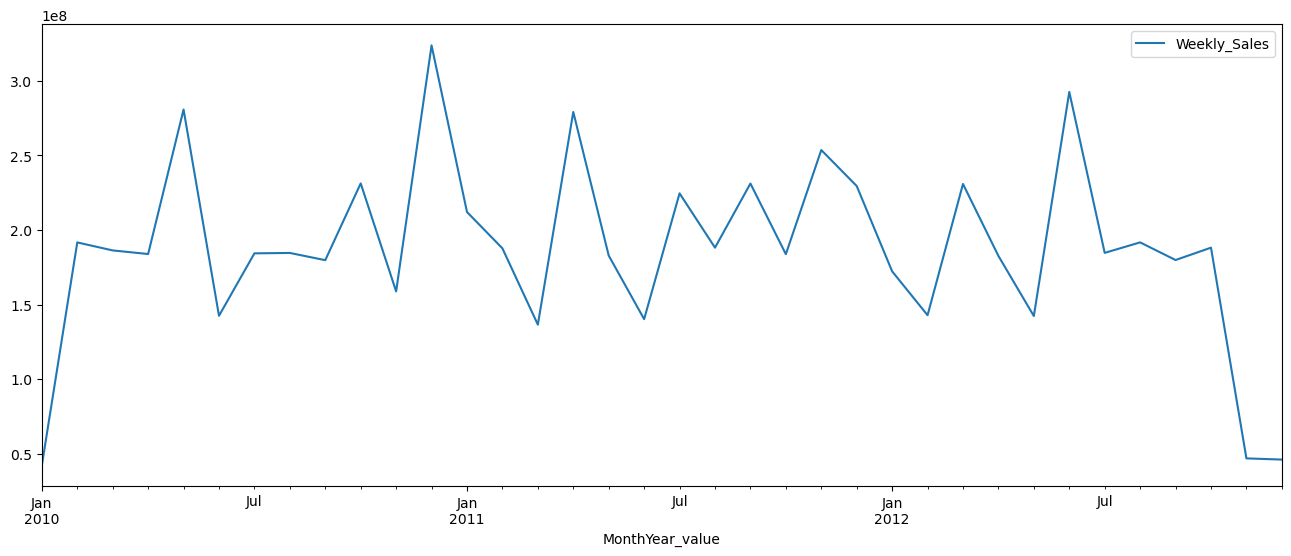

In [17]:
sales_year = df1.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(figsize=(16, 6), subplots=True)


Text(0.5, 1.0, 'Monthwise Sales')

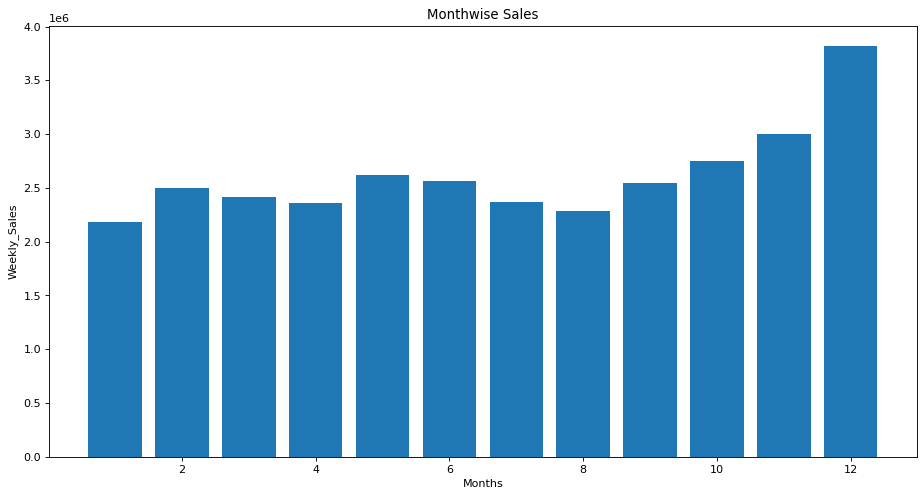

In [18]:
plt.figure(figsize=(14,7), dpi=80)
plt.bar(df1['Month'], df1['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise Sales')
#we find Weekly_Sales good in nov and Dec 
#we find Weekly_Sales is best in Dec

In [19]:
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value,Holiday,season,season_name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05,Non-Holiday,2,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12,Labour Day,1,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02,Non-Holiday,1,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02,Non-Holiday,1,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05,Non-Holiday,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,2012-09,Non-Holiday,4,Autumn
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,2012-05,Non-Holiday,2,Spring
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,2012-12,Non-Holiday,1,Winter
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,2012-10,Non-Holiday,4,Autumn


Text(0.5, 1.0, 'Seasons Sales')

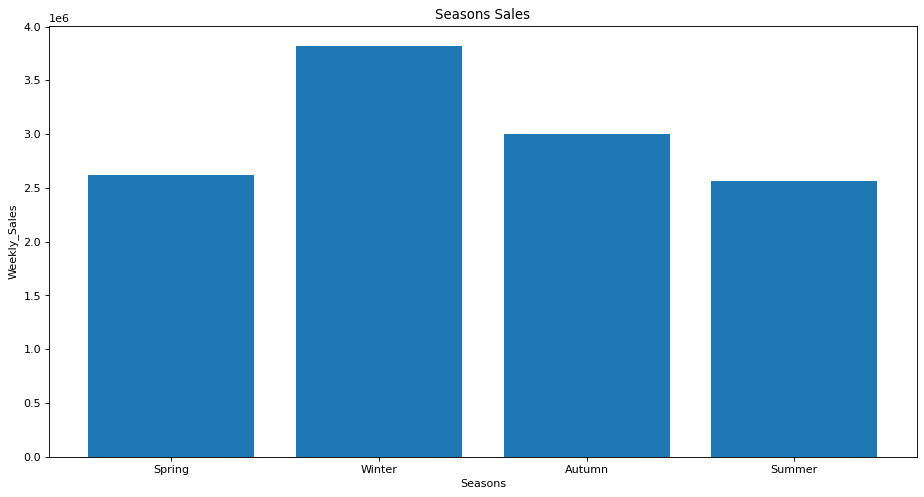

In [20]:
plt.figure(figsize=(14,7), dpi=80)
plt.bar(df1["season_name"],df1["Weekly_Sales"])
plt.xlabel('Seasons')
plt.ylabel('Weekly_Sales')
plt.title('Seasons Sales')

In [21]:
####we find that winter is the most sealing season 


Text(0.5, 1.0, 'Yearly Sales')

<Figure size 800x560 with 0 Axes>

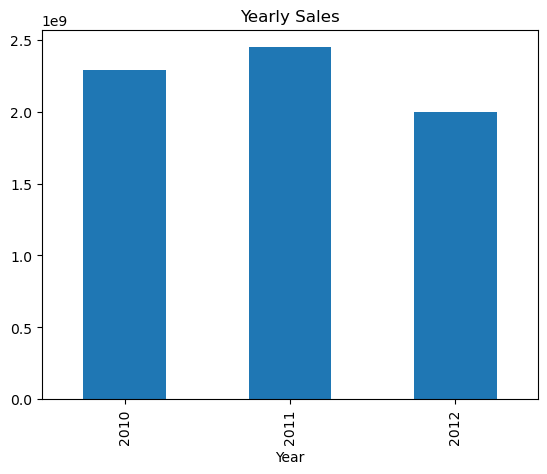

In [22]:
plt.figure(figsize=(10,7), dpi=80)
df1.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

In [23]:
#2011 is the best year for selling

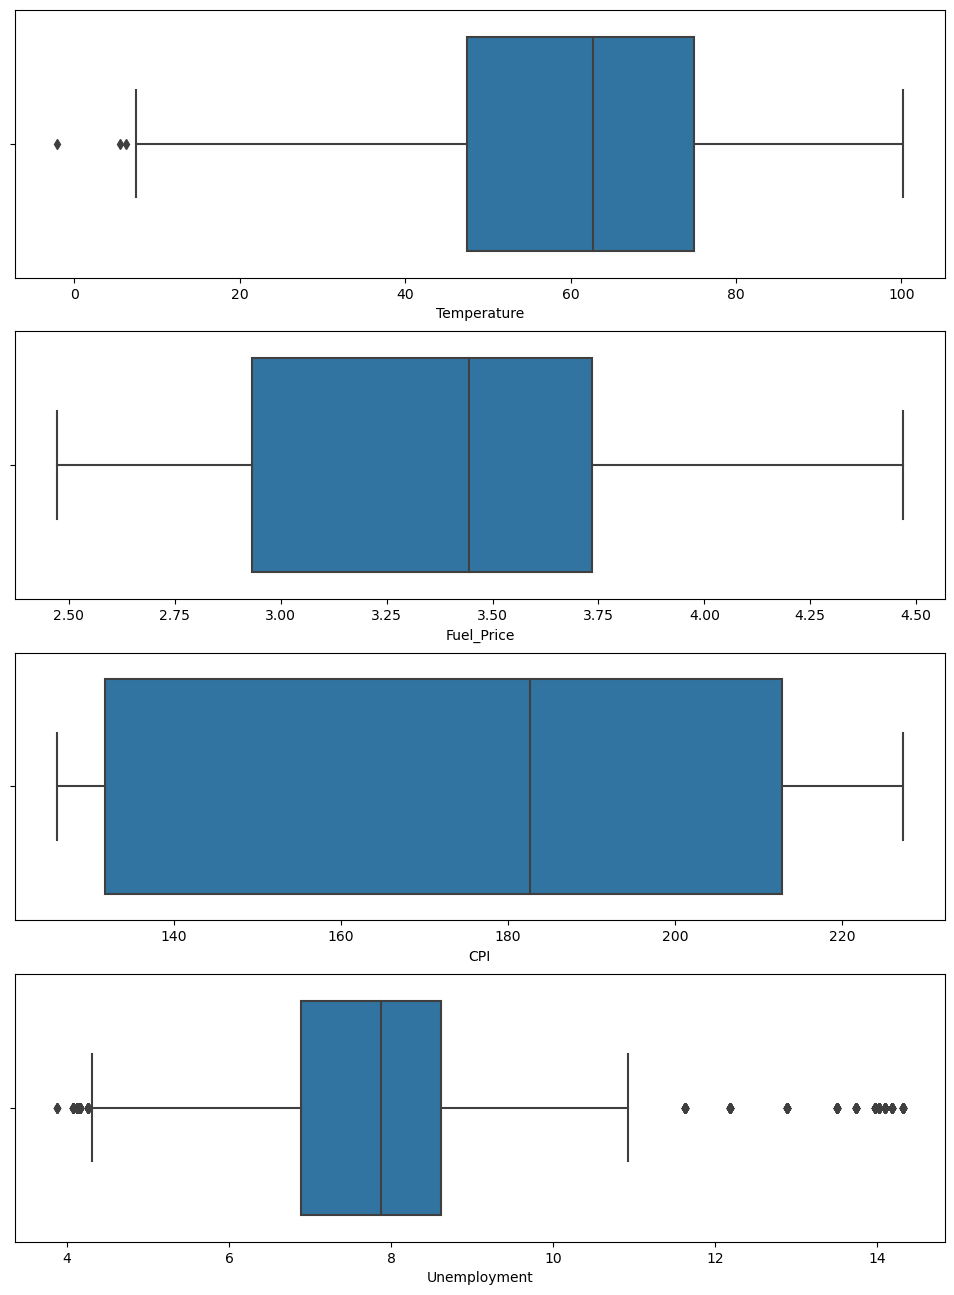

In [24]:
fig, axis = plt.subplots(4, figsize=(12,16))
x = df1[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])


    

In [25]:
#Group by data frame by Store
groupby_of_data1=df1.groupby(df1['Store'])["Weekly_Sales"].sum().to_frame()
groupby_of_data1

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [26]:
groupby_of_data1[groupby_of_data1["Weekly_Sales"]==groupby_of_data1["Weekly_Sales"].max()]
#Store 20 is the most seller

,Weekly_Sales
Store,
20,3.013978e+08


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

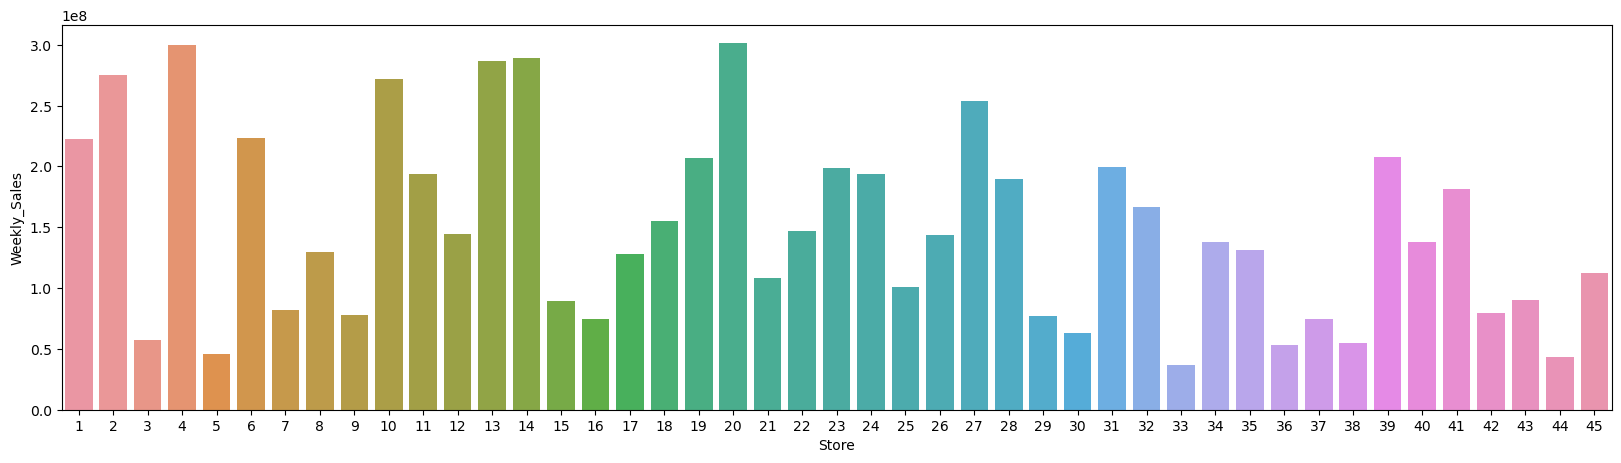

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=groupby_of_data1, x=groupby_of_data1.index, y="Weekly_Sales", ax=ax)

In [28]:
Pivot_of_data=pd.pivot_table(data=df,index=["Store"], values= 'Weekly_Sales',aggfunc=np.std)
Pivot_of_data.head()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745


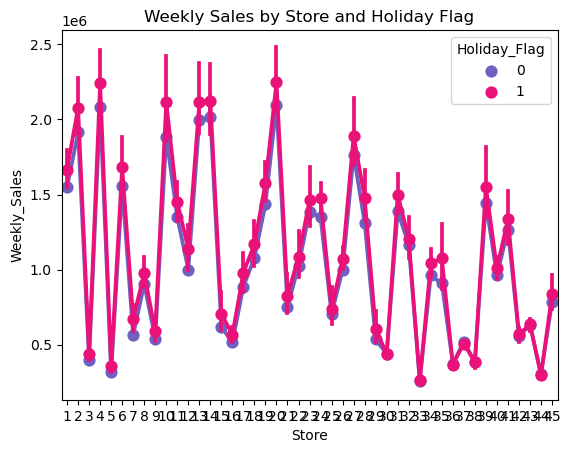

In [29]:
sns.pointplot(
    x="Store", 
    y="Weekly_Sales", 
    hue="Holiday_Flag", 
    data=df1, 
    palette=["#6F61C0", "#EA1179"]
)
plt.title("Weekly Sales by Store and Holiday Flag")
plt.show()

In [30]:
#which store has max std
Pivot_of_data=pd.pivot_table(data=df,index=["Store"], values= 'Weekly_Sales',aggfunc=np.std)
Pivot_of_data.head()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745


In [31]:
Pivot_of_data[Pivot_of_data['Weekly_Sales']==Pivot_of_data['Weekly_Sales'].max()]

,Weekly_Sales
Store,
14,317569.949476


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

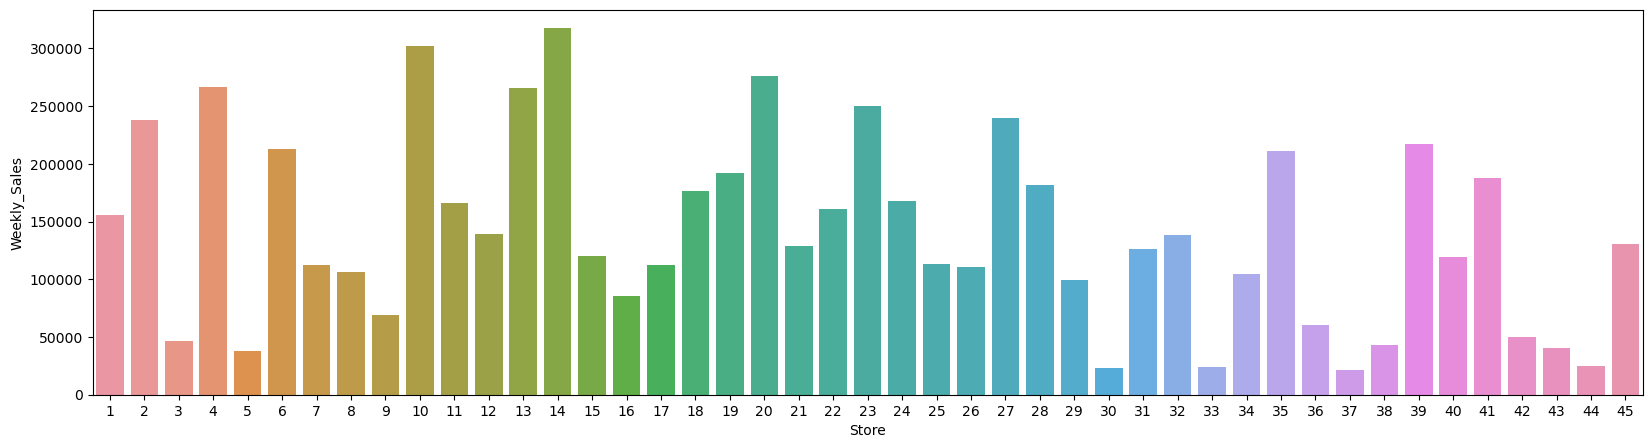

In [32]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=Pivot_of_data, x=Pivot_of_data.index, y="Weekly_Sales", ax=ax)

In [33]:
comp1=df.pivot_table(index=['Store'],columns=['Holiday_Flag'] ,values='Weekly_Sales',aggfunc={'Weekly_Sales': lambda x:x.mean() })
comp1

Holiday_Flag,0,1
Store,,
1,1.546957e+06,1665747.656
2,1.914209e+06,2079266.900
3,4.000648e+05,437811.050
4,2.083556e+06,2243102.624
5,3.148923e+05,359501.607
6,1.555993e+06,1680907.927
7,5.629645e+05,672400.265
8,9.037434e+05,975330.860
9,5.405993e+05,588950.821


In [34]:
#stores have holidayflag = 0
df.loc[comp1[comp1[1]<comp1[0]].index]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
30,1,03-09-2010,1540163.53,0,81.21,2.577,211.531248,7.787
36,1,15-10-2010,1459409.10,0,67.18,2.720,211.813744,7.838
37,1,22-10-2010,1345454.00,0,69.86,2.725,211.861294,7.838
38,1,29-10-2010,1384209.22,0,69.64,2.716,211.908844,7.838
44,1,10-12-2010,1682614.26,0,46.33,2.843,211.465953,7.838


In [35]:
#Some holidays have a negative impact on sales  holidaysthat have higher sales than the mean sales in the non-holiday seasonfor all stores together;#

mm=pd.DataFrame(index=df.Store,data=df1[['Date','Weekly_Sales','Fuel_Price','Holiday_Flag','Holiday']])
mm.head()

,Date,Weekly_Sales,Fuel_Price,Holiday_Flag,Holiday
Store,,,,,
1,2010-12-02,1641957.44,2.548,1,Labour Day
1,2010-12-02,1641957.44,2.548,1,Labour Day
1,2010-12-02,1641957.44,2.548,1,Labour Day
1,2010-12-02,1641957.44,2.548,1,Labour Day
1,2010-12-02,1641957.44,2.548,1,Labour Day


In [36]:
nono=mm[(mm['Holiday_Flag']==1)>(mm['Holiday_Flag']==0)]
nono['Holiday'].unique()


array(['Labour Day', 'Super Bowl'], dtype=object)

In [37]:
df.iloc[nono.index]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
...,...,...,...,...,...,...,...,...
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838


In [38]:
nono.index.unique()


Int64Index([1, 31, 42], dtype='int64', name='Store')

In [39]:
###holidays have a negative impact on sales are 3  Stores store:[1,31,42] in ['Labour Day', 'Super Bowl'] Holidays

In [40]:
dd=df1.groupby(["season_name"])['Weekly_Sales'].sum().to_frame()
dd

,Weekly_Sales
season_name,
Autumn,1.652620e+09
Spring,1.804507e+09
Summer,1.732564e+09
Winter,1.547528e+09


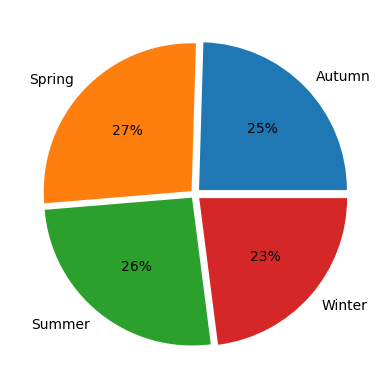

In [41]:
label=['Autumn','Spring','Summer','Winter']
explode = [0.04, 0.03, 0.03, 0.04]
plt.pie(dd['Weekly_Sales'],labels=label,explode=explode,  autopct='%.0f%%')
plt.show()

In [42]:
dm=df1.groupby(["Month"])["Weekly_Sales"].sum().to_frame()
dm

,Weekly_Sales
Month,
1,4.264263e+08
2,5.220257e+08
3,5.534864e+08
4,6.453239e+08
5,6.056966e+08
6,5.750180e+08
7,5.933139e+08
8,5.642317e+08
9,5.905323e+08


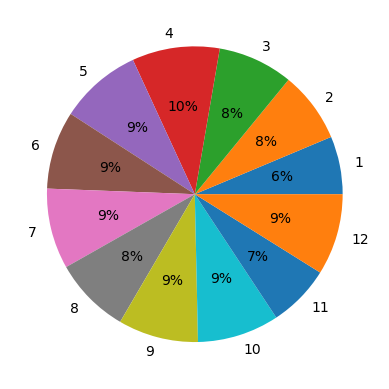

In [43]:
abel=range(1,13 )
explode = [0.04, 0.03, 0.03, 0.04]
plt.pie(dm['Weekly_Sales'],labels=abel,  autopct='%.0f%%')
plt.show()

In [44]:
#RFM

In [45]:
now = datetime(2022,12,25)

In [46]:
rfm=mm.groupby("Store").agg({
    "Date":lambda x :(now-x.max()).days,
    "Fuel_Price":lambda Fuel_Price: Fuel_Price.sum(),
    "Weekly_Sales":lambda Weekly_Sales: Weekly_Sales.sum()
    })
rfm

,Date,Fuel_Price,Weekly_Sales
Store,,,
1,4406,364.364,2.347999e+08
2,4692,359.502,2.305114e+08
3,4685,366.223,2.015910e+08
4,4619,375.375,2.223374e+08
5,4405,381.381,2.058544e+08
6,4664,388.960,2.105698e+08
7,4657,390.676,2.008335e+08
8,4707,388.817,2.280805e+08
9,4495,396.110,2.209948e+08


In [47]:
col_names=["Recency","Frequency","Monotery"]
rfm.columns=col_names
rfm

,Recency,Frequency,Monotery
Store,,,
1,4406,364.364,2.347999e+08
2,4692,359.502,2.305114e+08
3,4685,366.223,2.015910e+08
4,4619,375.375,2.223374e+08
5,4405,381.381,2.058544e+08
6,4664,388.960,2.105698e+08
7,4657,390.676,2.008335e+08
8,4707,388.817,2.280805e+08
9,4495,396.110,2.209948e+08


In [48]:
rfm["R"]=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm["F"]=pd.qcut(rfm['Frequency'],5,labels=[5,4,3,2,1])
rfm["M"]=pd.qcut(rfm['Monotery'],5,labels=[1,2,3,4,5])
rfm["Score"]=rfm["R"].astype(str)+rfm["F"].astype(str)+rfm["M"].astype(str)
rfm.head()

,Recency,Frequency,Monotery,R,F,M,Score
Store,,,,,,,
1,4406,364.364,2.347999e+08,5,5,5,555
2,4692,359.502,2.305114e+08,1,5,5,155
3,4685,366.223,2.015910e+08,1,5,1,151
4,4619,375.375,2.223374e+08,2,4,4,244
5,4405,381.381,2.058544e+08,5,3,2,532


In [49]:
seg_map = {
 r'[1-2][1-2]': 'Hibernating',
 r'[1-2][3-4]': 'At Risk',
 r'[1-2]5': 'Can\'t Loose',
 r'3[1-2]': 'About to Sleep',
 r'33': 'Need Attention',
 r'[3-4][4-5]': 'Loyal Customers',
 r'41': 'Promising',
 r'51': 'New Customers',
 r'[4-5][2-3]': 'Potential Loyalists',
 r'5[4-5]': 'Champions'
}


In [50]:
rfm['Segment']=rfm['M'].astype(str)+rfm['F'].astype(str)
rfm['Segment']=rfm['Segment'].replace(seg_map,regex=True)
rfm.head()

,Recency,Frequency,Monotery,R,F,M,Score,Segment
Store,,,,,,,,
1,4406,364.364,2.347999e+08,5,5,5,555,Champions
2,4692,359.502,2.305114e+08,1,5,5,155,Champions
3,4685,366.223,2.015910e+08,1,5,1,151,Can't Loose
4,4619,375.375,2.223374e+08,2,4,4,244,Loyal Customers
5,4405,381.381,2.058544e+08,5,3,2,532,At Risk


Text(0.5, 1.0, 'Stores Segment Count')

<Figure size 800x560 with 0 Axes>

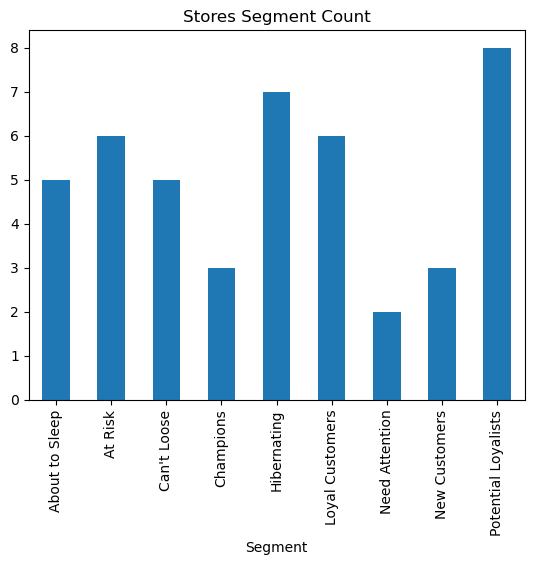

In [51]:
plt.figure(figsize=(10,7), dpi=80)
rfm.groupby('Segment')[['Segment']].count().plot(kind='bar', legend=False)
plt.title('Stores Segment Count')

In [52]:
#Sroes that Customers at risk
filtered = rfm.loc[rfm["Segment"] == "At Risk"]

print(filtered)

       Recency  Frequency      Monotery  R  F  M Score  Segment
Store                                                          
5         4405    381.381  2.058544e+08  5  3  2   532  At Risk
20        4566    379.379  2.034478e+08  3  4  2   342  At Risk
23        4545    375.089  2.071983e+08  3  4  2   342  At Risk
25        4531    377.520  1.961941e+08  3  4  1   341  At Risk
33        4475    375.232  1.933061e+08  4  4  1   441  At Risk
38        4440    388.388  1.979419e+08  5  3  1   531  At Risk


In [53]:
#compare correlation between ["segment "]in rfm data and [Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday,season_name] in df1 data

In [54]:
# Encode 'Segment' in rfm
rfm["Segment_encoded"] = pd.factorize(rfm["Segment"])[0]

# Encode 'Holiday' and 'season_name' in df1
df1["Holiday_encoded"] = pd.factorize(df1["Holiday"])[0]
df1["season_name_encoded"] = pd.factorize(df1["season_name"])[0]

In [56]:
# Merge the two DataFrames
combined = rfm[["Segment_encoded"]].join(
    df1[["Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Holiday_encoded", "season_name_encoded"]]
)

print(combined.head())  # Check the merged data


       Segment_encoded  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Store                                                                       
1                    0             0        42.31       2.572  211.096358   
1                    0             1        38.51       2.548  211.242170   
1                    0             0        39.93       2.514  211.289143   
1                    0             0        46.63       2.561  211.319643   
1                    0             0        46.50       2.625  211.350143   

       Unemployment  Holiday_encoded  season_name_encoded  
Store                                                      
1             8.106                0                    0  
1             8.106                1                    1  
1             8.106                0                    1  
1             8.106                0                    1  
1             8.106                0                    0  


In [58]:
combined.head()

,Segment_encoded,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_encoded,season_name_encoded
Store,,,,,,,,
1,0,0,42.31,2.572,211.096358,8.106,0,0
1,0,1,38.51,2.548,211.242170,8.106,1,1
1,0,0,39.93,2.514,211.289143,8.106,0,1
1,0,0,46.63,2.561,211.319643,8.106,0,1
1,0,0,46.50,2.625,211.350143,8.106,0,0


In [59]:
# Compute correlation
correlation_matrix = combined.corr()

# Focus on correlations involving 'Segment_encoded'
segment_correlations = correlation_matrix["Segment_encoded"].sort_values(ascending=False)

print("Correlations with 'Segment':")
print(segment_correlations)


Correlations with 'Segment':
Segment_encoded        1.000000e+00
Temperature            2.829227e-02
Fuel_Price             7.827229e-03
season_name_encoded    3.402563e-16
Holiday_encoded       -1.149195e-17
Holiday_Flag          -1.004681e-16
CPI                   -8.273764e-04
Unemployment          -7.608412e-03
Name: Segment_encoded, dtype: float64


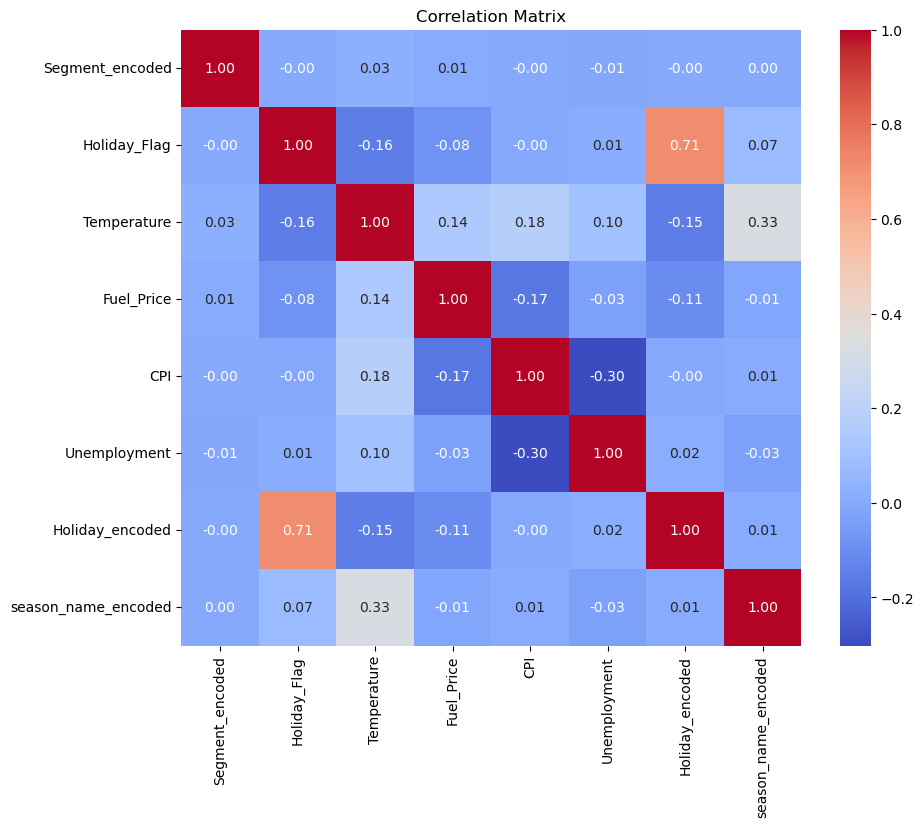

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()